# Proyecto Final
# Reconocimiento de Patrones
# Ronny Jimenez / Fabricio Quirós

## Introducción

El presente Notebook pretende mostrar los pasos que se requirieron para entrenar un set de datos bajo el framework de Keras y utilizando una Red Neuronal Convolucional. 

Los datos que se utilzan son los de CIFAR10: un conjunto de imagenes pequeñas, de 32x32 pixeles, que consiste en 50000 imagenes a color para el entrenamiento y 10000 imagenes para validación. Las imagenes para el entrenamiento están etiquetadas sobre 10 categorias:

    avión:0
    vehículos: 1
    aves : 2
    gatos : 3
    venados : 4
    perros : 5
    ranas : 6
    caballos : 7
    barcos : 8
    camiones : 9

de esta forma, cada categoria tiene une etiqueta del 0-9. 

Para incluir esta base de datos es necesaria la linea

    from keras.datasets import cifar10
    
Un ejemplo de este data set se muestra a continuacion

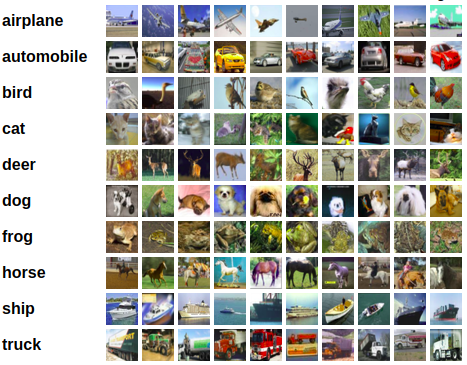

In [27]:

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as k
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [28]:
matplotlib.style.use('seaborn')

In [29]:
# El conjunto de datos de CIFAR10 es cargado
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

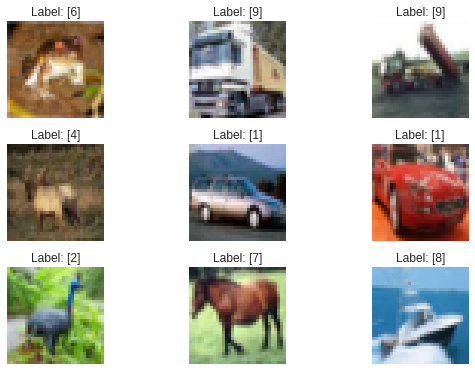

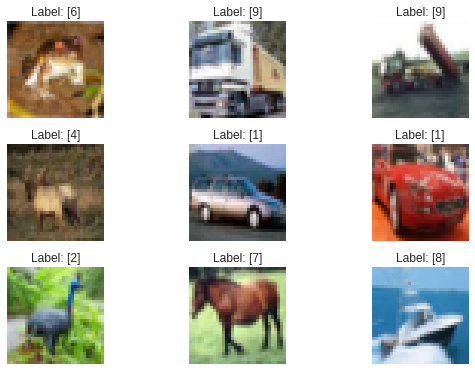

In [30]:
# Se muestra algunas de las imagenes

fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], interpolation='none')
  plt.title("Label: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [31]:
# let's print the actual data shape before we reshape and normalize

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)


X_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)
X_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


In [32]:
# el tamaño de entrada de los datos es de 32x32
img_rows , img_cols = 32, 32

#reshaping
#this assumes our data format
#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).

if k.image_data_format() == 'channels_first':
    print("It is 3D")
#    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
#    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
#    input_shape = (1, img_rows, img_cols)
else:
    print("Not 3D")
#    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
#    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 3)

#more reshaping
#X_train = X_train.astype('float32')
#X_test = X_test.astype('float32')
#X_train /= 255
#X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Not 3D
X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [33]:
print(np.unique(y_train, return_counts=True))

#set number of categories
num_category = 10

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)
y_train[0]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))


array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [34]:
#CHANGE PARAMETERS

#model building
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(num_category, activation='softmax'))
#Adaptive learning rate (adaDelta) is a popular form of gradient descent rivaled only by adam and adagrad
#categorical ce since we have multiple classes (10) 
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
__________

In [35]:
import time

batch_size = 128
num_epoch = 10

#model training

start = time.time()

model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))

end = time.time()
m = (end - start)/60
m = round(m, 2)
s = (end - start)
s = round(s, 2)

print(f"Training time: {m} min / {s} sec")

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 36s 723us/step - loss: 14.5057 - acc: 0.0992 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/10
50000/50000 [==============================] - 36s 716us/step - loss: 14.4969 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/10
50000/50000 [==============================] - 35s 700us/step - loss: 14.5010 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/10
50000/50000 [==============================] - 36s 713us/step - loss: 14.5041 - acc: 0.0988 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/10
50000/50000 [==============================] - 36s 714us/step - loss: 11.0213 - acc: 0.1119 - val_loss: 2.1536 - val_acc: 0.1999
Epoch 6/10
50000/50000 [==============================] - 36s 712us/step - loss: 1.8557 - acc: 0.3256 - val_loss: 1.4418 - val_acc: 0.4951
Epoch 7/10
50000/50000 [==============================] - 3